In [0]:
import numpy as np
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
# train = pd.read_csv("https://doc-0k-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/20ums70s8ap6sqiqcj2342qi1klcik0e/1536134400000/05526947277829673898/*/19T3H_BJzwaRyugkWlGRvpsxtyaqWM7sY?e=download")


In [0]:
data_train = pd.read_csv('https://doc-0k-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/klrcjlgokj0qpu9q3gab2p3acpkpdq2p/1536199200000/05526947277829673898/*/19T3H_BJzwaRyugkWlGRvpsxtyaqWM7sY?e=download')
data_test = pd.read_csv('https://doc-0o-9k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/pt9uve1qe80361m9vombk8j9pd4s815d/1536199200000/05526947277829673898/*/1_YDlEWdTueb0hbiD29_B-B5_gsbUUQ02?e=download')

In [6]:
#Splitting data into features and labels
#Converting X into numpy array
#Converting y into 1-hot encoding by using to_categorical from keras

from keras.utils import to_categorical

#Training Data
X = np.array(data_train.iloc[:, 1:])
y = to_categorical(data_train.iloc[:, 0])

#Testing Data
X_test = np.array(data_test.iloc[:, 1:])
y_test = to_categorical(data_test.iloc[:, 0])

Using TensorFlow backend.


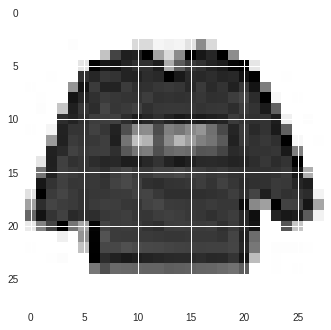

In [7]:
#Test drawing an image, just to check

test_image = X[0].reshape(28,28)
plt.imshow(test_image)

In [0]:
img_size = 28

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 13)

In [10]:
#Check the shape of all splits

print(X_train.shape, y_train.shape)
print(X_val.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(48000, 784) (48000, 10)
(12000, 784) (48000, 10)
(10000, 784) (10000, 10)


In [0]:
# Now we train, test and validation splits in numpy
# And their outputs in categorical or 1-hot encoding
# it's time to reshape the data into image format i.e. 28 x 28

X_train = X_train.reshape(X_train.shape[0], img_size, img_size, 1)
X_val = X_val.reshape(X_val.shape[0], img_size, img_size, 1)
X_test = X_test.reshape(X_test.shape[0], img_size, img_size, 1)

In [12]:
#Check the shape of all splits

print(X_train.shape, y_train.shape)
print(X_val.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(48000, 28, 28, 1) (48000, 10)
(12000, 28, 28, 1) (48000, 10)
(10000, 28, 28, 1) (10000, 10)


In [0]:
# Converting input data into float value
# Dividing all the values by 255 because ML works best when data in scaled into 0 and 1
# Note - Pixel maximum value can't go beyond 255.

X_train = X_train.astype(np.float32)
X_val = X_val.astype(np.float32)
X_test = X_test.astype(np.float32)

X_train /= 255
X_val /= 255
X_test /= 255

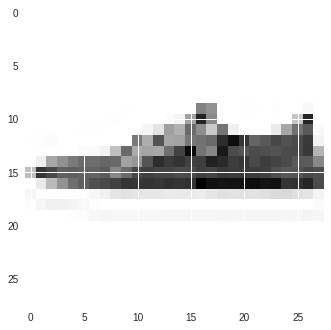

In [14]:
#Test drawing an image, just to check everything looks good

test_image2 = X_train[0].reshape(28,28)
plt.imshow(test_image2)

In [0]:
#Time to prepare Keras Model

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

batch_size = 256
num_classes = 10
epochs = 50

# Image Dimension
img_size = 28

# Input shape. A 4-D tensor
input_shape = (img_size, img_size, 1)

model = Sequential()

model.add(Conv2D(32,
                 kernel_size=(3,3),
                 activation='relu',
                 kernel_initializer='random_uniform',
                 bias_initializer='zeros',
                 input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
# model.add(Dropout(0.3))

# model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
# model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dropout(0.30))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.30))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss = keras.losses.categorical_crossentropy,
              optimizer= keras.optimizers.Adam(),
              metrics=['accuracy'])

In [57]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_48 (Dropout)         (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_13 (Flatten)         (None, 1600)              0         
__________

In [58]:
# Now we will fit our data into the model that we have created.
# NOTE: model.fit() returns a history object which can be used for further analysis.
# Like plotting graphs of loss, accuracies etc.

history = model.fit(X_train, y_train,
                    batch_size = batch_size,
                    epochs = epochs,
                    verbose=1, validation_data=(X_val, y_val))

test_score = model.evaluate(X_test, y_test, verbose=0)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 62s 1ms/step - loss: 1.0297 - acc: 0.6171 - val_loss: 0.5854 - val_acc: 0.7726
Epoch 2/50
48000/48000 [==============================] - 60s 1ms/step - loss: 0.6276 - acc: 0.7663 - val_loss: 0.4947 - val_acc: 0.8097
Epoch 3/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.5511 - acc: 0.7952 - val_loss: 0.4428 - val_acc: 0.8329
Epoch 4/50
48000/48000 [==============================] - 61s 1ms/step - loss: 0.5031 - acc: 0.8131 - val_loss: 0.4111 - val_acc: 0.8495
Epoch 5/50
48000/48000 [==============================] - 62s 1ms/step - loss: 0.4713 - acc: 0.8293 - val_loss: 0.3847 - val_acc: 0.8592
Epoch 6/50
48000/48000 [==============================] - 59s 1ms/step - loss: 0.4398 - acc: 0.8390 - val_loss: 0.3645 - val_acc: 0.8677
Epoch 7/50
48000/48000 [==============================] - 57s 1ms/step - loss: 0.4245 - acc: 0.8472 - val_loss: 0.3459 - val_acc

In [59]:
test_loss = test_score[0]
test_acc = test_score[1]
print("Test Loss is : {}\nTest Accuracy is : {} or say {}%".format(test_loss, test_acc, test_acc*100))

Test Loss is : 0.20914359041452407
Test Accuracy is : 0.9238 or say 92.38%
